<a href="https://colab.research.google.com/github/smaciasg/Ejercicios_DataScience_Coding_Dojo/blob/main/%C2%BFRegresi%C3%B3n_log%C3%ADstica%2C_bosque_aleatorio_o_KNN%3F_(base).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBJETIVO:**  predecir el tipo de uva basándose en sus características

###**1) Importar las librerías necesarias**

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Librerías para preprocesamiento
import sklearn
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
#Librerías para modelos de selección
from sklearn.model_selection import train_test_split
#Librería para el modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#Librería para las métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, plot_confusion_matrix
#Para optimizar
from sklearn.model_selection import GridSearchCV

###**2) Cargar los datos y explorar**

In [152]:
wine = pd.read_csv('/content/drive/MyDrive/CODING DOJO/DATA SCIENCE/ACTIVIDADES SEMANA 7 - MODELOS DE PREDICCIÓN CLASIFICACIÓN/Wine_cultivars.csv')
wine.head()

,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [153]:
#Explorar loss datos
wine.info()
#No hay filas vacías y todas las comlumnas son numéricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavonid phenols           178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

La columna objetivo es **Class label**, se observa que no es necesario ningún tipo de transformación, se evidencia de igual manera que no pareciera haber alguna comuna con un característica que tenga un orden de prevalencia, hablando de las columnas de datos enteros

###**3) Crear la matriz de caracteríticas y el vector objetivo**

In [154]:
X = wine.drop(columns='Class label')
y = wine['Class label']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

###**4) Instanciar los transformadores**

En este caso como todas las columnas son numéricas sólo necesitamos instanciar un scaler que va a funcionar para todos los modelos que se deseen trabajar.

In [155]:
scaler = StandardScaler()

##**5) MODELO: Regresión logística**

**Instanciar el modelo de la regresión logística, sin ningún hiperparámetro**

In [156]:
reg_log = LogisticRegression()

**Crear pipeline**

In [157]:
log_reg_pipe = make_pipeline(scaler,reg_log)

**Ajustar el modelo a los datos de entrenamiento**

In [158]:
log_reg_pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

**Predecir con el conjunto de pruebas**

In [159]:
log_reg_pred = log_reg_pipe.predict(X_test)

**Métrica por defecto del modelo**

In [160]:
socre_log_reg = log_reg_pipe.score(X_test,y_test)
socre_log_reg

0.9777777777777777

Se observa que hay un sobre ajuste, se pretender realizar una búsqueda de un mejor hiperparámetro C

###**OPTIMIZACIÓN HIPERPARÁMETRO C**

**Usando regularización l1**

In [161]:
#Crear lista de posibles valores c
lista_c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000]
lista_train_score = []
lista_test_score = []
for c in lista_c: 
  log_reg_opti = LogisticRegression(C=c, solver='liblinear', max_iter=1000, penalty='l1')
  log_reg_opti_pipe = make_pipeline(scaler,log_reg_opti)
  log_reg_opti_pipe.fit(X_train, y_train)
  lista_train_score.append(log_reg_opti_pipe.score(X_train,y_train))
  lista_test_score.append(log_reg_opti_pipe.score(X_test,y_test))

dic_l1={score:c for c,score in zip(lista_c,lista_test_score)}

In [162]:
dic_l1.get(max(lista_test_score))

0.1

In [163]:
{c:score for c,score in zip(lista_c,lista_test_score)}

{0.0001: 0.3333333333333333,
 0.001: 0.3333333333333333,
 0.01: 0.3333333333333333,
 0.1: 1.0,
 1: 0.9777777777777777,
 10: 0.9777777777777777,
 100: 0.9777777777777777,
 1000: 0.9777777777777777}

**Usando regularización l2**

In [164]:
#Crear lista de posibles valores c
lista_c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000]
lista_train_score = []
lista_test_score = []
for c in lista_c: 
  log_reg_opti = LogisticRegression(C=c, solver='liblinear', max_iter=1000, penalty='l2')
  log_reg_opti_pipe = make_pipeline(scaler,log_reg_opti)
  log_reg_opti_pipe.fit(X_train, y_train)
  lista_train_score.append(log_reg_opti_pipe.score(X_train,y_train))
  lista_test_score.append(log_reg_opti_pipe.score(X_test,y_test))

dic_l2={score:c for c,score in zip(lista_c,lista_test_score)}

In [165]:
dic_l2.get(max(lista_test_score))

1000

In [166]:
{c:score for c,score in zip(lista_c,lista_test_score)}

{0.0001: 0.9111111111111111,
 0.001: 0.9333333333333333,
 0.01: 0.9555555555555556,
 0.1: 0.9777777777777777,
 1: 0.9777777777777777,
 10: 0.9777777777777777,
 100: 0.9777777777777777,
 1000: 0.9777777777777777}

En el caso de la regularización l2 se logra un mejor desempeño con cualquuiera de los C probados, pero ninguno supera el valor ya obtenido con la regresión sin modificar los hiperparámetros, por lo que al menos el valor C, en este caso no es el hiperparámetro a modificar, en caso tal, la regularización l2, llega más rápido a un score alto y estable

##**6)MODELO: Bosque aleatorio**

**Instanciar el modelo de bosque aleatorio sin ningún hiperparámnetro**

In [167]:
bosque_aletario = RandomForestClassifier(random_state=42)

**Crear pipeline**

In [168]:
tree_aleatorio_pipe = make_pipeline(scaler,bosque_aletario)

**Ajustar modelo a los datos de entrenamiento**

In [169]:
tree_aleatorio_pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

**Predecir valores**

In [170]:
tree_precitiones = tree_aleatorio_pipe.predict(X_test)

**Validar desempeño del modelo**

In [171]:
score_tree_aleatorio = tree_aleatorio_pipe.score(X_test,y_test)
score_tree_aleatorio

1.0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


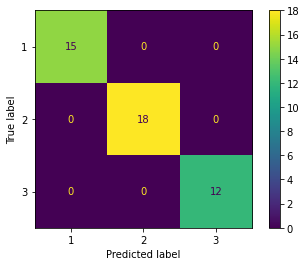

In [172]:
plot_confusion_matrix(tree_aleatorio_pipe, X_test,y_test)

In [185]:
#Dado que el mejor score está en valor del rango de la unidad, se hacer for entre 1 y 9
mejor_score = []
lista_optimo = {}
lista_profundidad = []
for profundidad in range(1,10):
  bosque_aletario = RandomForestClassifier(random_state=42, max_depth=profundidad)
  tree_aleatorio_pipe = make_pipeline(scaler,bosque_aletario)
  tree_aleatorio_pipe.fit(X_train,y_train)
  score_tree_aleatorio = tree_aleatorio_pipe.score(X_test,y_test)
  mejor_score.append(score_tree_aleatorio)
  lista_profundidad.append(profundidad)
  lista_optimo[score_tree_aleatorio] = profundidad

In [186]:
{profundidad:score for profundidad,score in zip(lista_profundidad,mejor_score)}

{1: 0.9333333333333333,
 2: 0.9777777777777777,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0}

###**OPTIMIZACIÓN DE HIPERPARÁMETROS**

No habría necesidad de ajustar hiperparámetros, tal vez, para que el modelo no tenga un desempeño del 100%, lo cual podría indicar un desbalanceo en los datos.

##**7) MODELO: KNN**

**Instanciar el modelo**

In [175]:
knn_wine = KNeighborsClassifier()

**Instanciar pipeline**

In [176]:
knn_wine_pipe = make_pipeline(scaler,knn_wine)

**Ajustar modelo a los datos de entrenamiento**

In [177]:
knn_wine_pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

**Calcular predicciones**

In [178]:
knn_wine_precitions = knn_wine_pipe.predict(X_test)

**Evaluar desempeño del modelo**

In [179]:
score_knn = knn_wine_pipe.score(X_test,y_test)
score_knn

0.9555555555555556

**Ajustar hiperparámetros**

In [180]:
knn_wine_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [181]:
grid_param_knn = {'n_neighbors':[1,10,100]}
grid_knn = GridSearchCV(knn_wine,grid_param_knn, cv=5)

grid_knn.fit(X_train,y_train)
grid_knn.best_params_

{'n_neighbors': 1}

In [182]:
#Dado que el mejor score está en valor del rango de la unidad, se hacer for entre 1 y 9
mejor_score = []
lista_optimo = {}
lista_vecinos = []
for kvecinos in range(1,10):
  knn_wine = KNeighborsClassifier(n_neighbors=kvecinos)
  knn_wine_pipe = make_pipeline(scaler,knn_wine)
  knn_wine_pipe.fit(X_train,y_train)
  score_knn = knn_wine_pipe.score(X_test,y_test)
  mejor_score.append(score_knn)
  lista_vecinos.append(kvecinos)
  lista_optimo[score_knn] = kvecinos

In [183]:
{kvecinos:score for kvecinos,score in zip(lista_vecinos,mejor_score)}

{1: 0.9555555555555556,
 2: 0.9333333333333333,
 3: 0.9555555555555556,
 4: 0.9555555555555556,
 5: 0.9555555555555556,
 6: 0.9777777777777777,
 7: 0.9777777777777777,
 8: 0.9777777777777777,
 9: 0.9777777777777777}

**Reformular modelo con kvecinos = 6

In [184]:
knn_wine = KNeighborsClassifier(n_neighbors=6)
knn_wine_pipe = make_pipeline(scaler,knn_wine)
knn_wine_pipe.fit(X_train,y_train)
score_knn = knn_wine_pipe.score(X_test,y_test)
score_knn

0.9777777777777777

##**PREGUNTAS FINALES**

1.¿Cuál es el modelo que mejor funciona? 

R// El modelo que mejor desempeño tiene es el bosque aleatorio.

2.¿Cuáles hiperparámetros afinaron para cada uno de los modelos? ¿Hay algún modelo que les gustó más y por qué?

R// Todos los modelos funcionan muy bien, en general el boque aletario funciona muy bien, pero se ajusta tanto que podría correr el riesgo de no servir para nuevas muestras. 

Respecto a hiperparámetros en la regresión logística se ajustó el parámetro C y el tipo de regularización, para KNN se optimizó el número de vecinos.

Para el bosque aleatorio, se encontró en con una profundidad de 2 era suficiente para obtener resultados adecuados, tal vez, con el fin de mejorar el rendimiento del modelo se pueda cambiar el valor de la profundidad.

Con respecto a poder ver cómo cambia el desempeño del modelo al modificar su función de costo, me pareció muy interesante la regresión logística y la regularización.